## Discrete Random Variables and Their Distributions 
***

In this notebook we'll get some practice with discrete random variables and see how we can play with binomial distributions using Python.   

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also need SciPy's binom function for computing binomial coefficients.  

In [1]:
import numpy as np 
import matplotlib.pylab as plt 

%matplotlib inline

## Plotting Discrete Probability Distributions

In our lessons we examined the following probability mass function (i.e. probability distribution for the discrete random variable X):

|k | P(X=k)|
|--|--|
|3 | 0.1|
|4 | 0.2 |
|6 | 0.4 | 
| 8 |0.3 |

Let's look at two options for plotting the histogram for this pmf.

**OPTION 1:**

Since we know the exact probabilities for each value of the random variable $X$, we can plot bars with height equal to the probabilities, and width = 1.  
Numpy has a built-in function `.bar` that can do this for us:

In [3]:
k=[3, 4, 6, 8]
prob_k = [0.1, 0.2, 0.4, 0.3]

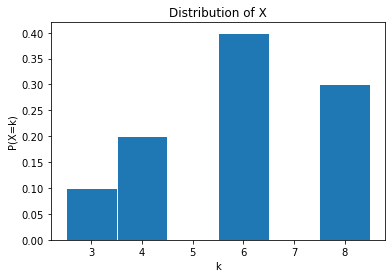

In [6]:
fig, ax = plt.subplots(1, 1)

ax.bar(k, prob_k, width=1, ec='white')

#Always include a title
plt.title("Distribution of X");

#Label what the x and y axes represent:
plt.ylabel("P(X=k)");
plt.xlabel("k");

**OPTION 2:**

Alternatively, we could create an array of data with values of $k$ proportional to the probability that $X=k$, and plot a **density** histogram of this data. 

That is, we could create an array of 100 values such that:
 - 10 of the values are equal to 3
 - 20 of the values are equal to 4
 - 40 of the values are equal to 6
 - 30 of the values are equal to 8
 

In [7]:
ar3 = np.ones(10)*3
ar4=np.ones(20)*4
ar6 = np.ones(40)*6
ar8=np.ones(30)*8

data = np.concatenate((ar3, ar4, ar6, ar8))

data

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.])

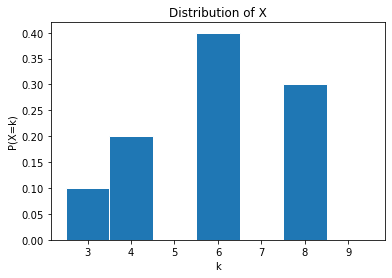

In [11]:
#Plotting a histogram of values in data

fig, ax = plt.subplots(1, 1)

b=np.arange(2.5, 10.5, 1)
ax.hist(data, density=True, bins=b, ec="white")

#Always include a title
plt.title("Distribution of X");

#Label what the x and y axes represent:
plt.ylabel("P(X=k)");
plt.xlabel("k");

### Sampling Values from a Discrete Distribution

We can use `np.random.choice` to simulate random draws from this distribution.  For example:

In [19]:
sim_data=np.random.choice([3,4,6,8], p=[0.1, 0.2, 0.4, 0.3], size=1000)
sim_data;

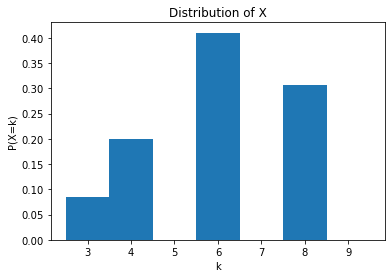

In [20]:
#Plotting a histogram of simulated values

fig, ax = plt.subplots(1, 1)


ax.hist(sim_data, density=True, bins=np.arange(2.5, 10.5, 1))

#Always include a title
plt.title("Distribution of X");

#Label what the x and y axes represent:
plt.ylabel("P(X=k)");
plt.xlabel("k");

### Exercise 1 - Implementing and Sampling the Binomial Distribution 
***

**Part A**: Write a function that takes in the parameters of the binomial distribution, $n$ and $p$, and returns the probability distribution as a Numpy array. In order to get the coefficient in the binomial distribution, you'll need a way to compute the combination ${n \choose k}$.  You can do this from scratch using Python's factorial function, or you can get the value directly using Scipy's canned function [binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.binom.html).



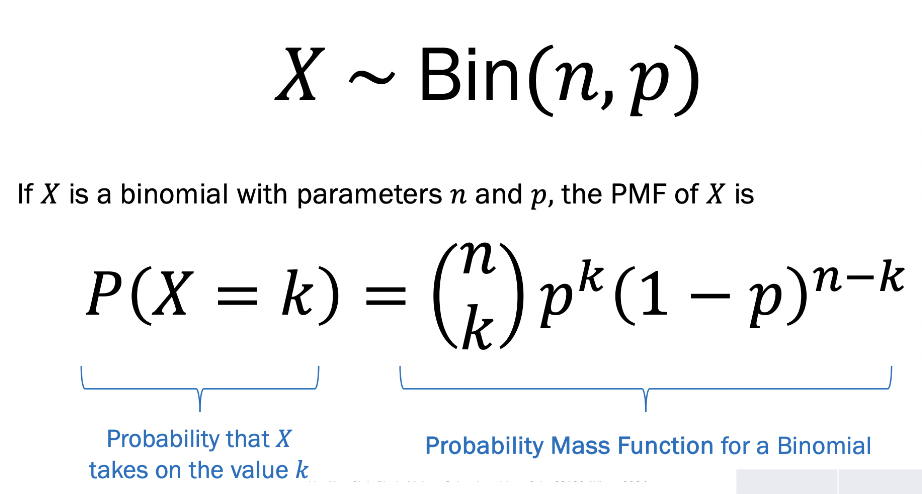

In [21]:
from scipy.special import binom


def binomial_dist(n, p):
    # The following code uses list comprehension
    p = np.array([binom(n,k)*p**k*(1-p)**(n-k) for k in range(n+1)])
    return p


In [22]:
binomial_dist(100,0.40)

array([6.53318624e-23, 4.35545749e-21, 1.43730097e-19, 3.13012212e-18,
       5.06036409e-17, 6.47726603e-16, 6.83711415e-15, 6.12084504e-14,
       4.74365491e-13, 3.23271298e-12, 1.96117920e-11, 1.06973411e-10,
       5.28924089e-10, 2.38693948e-09, 9.88874926e-09, 3.77969972e-08,
       1.33864365e-07, 4.40964967e-07, 1.35555897e-06, 3.90020476e-06,
       1.05305529e-05, 2.67442612e-05, 6.40241405e-05, 1.44750231e-04,
       3.09604660e-04, 6.27465445e-04, 1.20666432e-03, 2.20476937e-03,
       3.83209914e-03, 6.34278479e-03, 1.00075049e-02, 1.50650611e-02,
       2.16560254e-02, 2.97496914e-02, 3.90829279e-02, 4.91328237e-02,
       5.91413618e-02, 6.81990479e-02, 7.53778950e-02, 7.98876836e-02,
       8.12191450e-02, 7.92381902e-02, 7.42071940e-02, 6.67289497e-02,
       5.76295474e-02, 4.78111801e-02, 3.81103610e-02, 2.91909148e-02,
       2.14877567e-02, 1.52022224e-02, 1.03375113e-02, 6.75654330e-03,
       4.24449515e-03, 2.56271405e-03, 1.48700692e-03, 8.29119010e-04,
      

**Part B**:
    
   i).  Create an array with the probability distribution for a binomial with n=100 and p=0.40
   
   ii).  Print out the first 10 entries of the array
   
   iii). Then plot a histogram

In [23]:
prob = binomial_dist(100, 0.40)

# Here is a check that your binomial_pmf function at least sums to 1
np.sum(prob)

0.9999999999999998

In [ ]:
binomial_dist(100,0.40)[-10:]

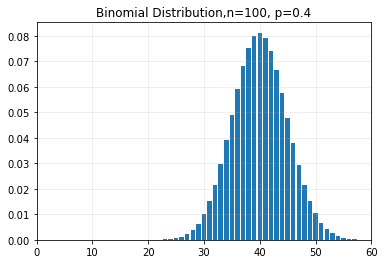

In [27]:
n=100
p=.40

X = np.array(range(n+1))
pmf = binomial_dist(n, p)

fig, ax = plt.subplots()
#Note we are NOT using .hist, because we have a list of probabilities 
#that each represent the height of separate bars.

ax.bar(X,pmf )

ax.grid(alpha=0.25)
plt.xlim(0,60)
plt.title("Binomial Distribution,n=100, p=0.4");



**Part C**:  Let $X\sim Bin(100, 0.40)$  Use your function above to calculate the following:

   i).What is $P(X=8)$?
    
   ii).  What is $P(X \leq 8)$
   
   iii).  What is $P(X \leq 15)$?

In [26]:
prob_x_equals_8 = prob[8]
prob_x_equals_8

4.743654909350739e-13

In [28]:
prob_x_leq_8=np.sum(binomial_dist(100, 0.40)[:9])
prob_x_leq_8

5.431126640406793e-13

In [29]:
prob_x_leq_15 = np.sum(binomial_dist(100, 0.40)[:16])
prob_x_leq_15

5.073197103174387e-08

## Built-In Python Functions

Python's scientific computing library `scipy` has built-in functions to calculate the Probability Mass Functions (PMFs) for Discrete Random Variables

https://docs.scipy.org/doc/scipy/reference/stats.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html



In [30]:
from scipy.stats import binom


#Recalculate part C(i) above using built-in functions
# X~Bin(100, .40) What is $P(X=8)$?

binom.pmf(k=8, n=100, p=0.40)


4.743654909350729e-13

In [32]:

X = np.array(range(101))
print(X)

binom.pmf(X,n=100, p=0.40 )

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


array([6.53318624e-23, 4.35545749e-21, 1.43730097e-19, 3.13012212e-18,
       5.06036409e-17, 6.47726603e-16, 6.83711415e-15, 6.12084504e-14,
       4.74365491e-13, 3.23271298e-12, 1.96117920e-11, 1.06973411e-10,
       5.28924089e-10, 2.38693948e-09, 9.88874926e-09, 3.77969972e-08,
       1.33864365e-07, 4.40964967e-07, 1.35555897e-06, 3.90020476e-06,
       1.05305529e-05, 2.67442612e-05, 6.40241405e-05, 1.44750231e-04,
       3.09604660e-04, 6.27465445e-04, 1.20666432e-03, 2.20476937e-03,
       3.83209914e-03, 6.34278479e-03, 1.00075049e-02, 1.50650611e-02,
       2.16560254e-02, 2.97496914e-02, 3.90829279e-02, 4.91328237e-02,
       5.91413618e-02, 6.81990479e-02, 7.53778950e-02, 7.98876836e-02,
       8.12191450e-02, 7.92381902e-02, 7.42071940e-02, 6.67289497e-02,
       5.76295474e-02, 4.78111801e-02, 3.81103610e-02, 2.91909148e-02,
       2.14877567e-02, 1.52022224e-02, 1.03375113e-02, 6.75654330e-03,
       4.24449515e-03, 2.56271405e-03, 1.48700692e-03, 8.29119010e-04,
      

In [33]:
sum(binom.pmf(np.array(range(9)),n=100, p=0.40))

5.431126640406782e-13

There's a built-in way to calculate the sum in the previous cell.

The Cumulative Distribution Function (CDF), $F(a)$ of a Random Variable $X$ is:

$F(a) = P(X \leq a)$

`binom.cdf(a, n, p)` will calculate this for you.



In [34]:
binom.cdf(8, n=100, p=0.4)

5.431126640406794e-13

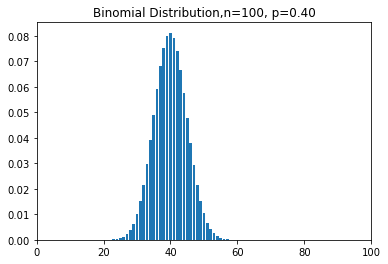

In [35]:
# Recreate Binomial Distribution Histogram using built-in binom.pmf function:


n=100
p=.40

X = np.array(range(n+1))
pmf = binom.pmf(X,n, p)

fig, ax = plt.subplots()
#Note we are NOT using .hist, because we don't have an array of data, 
#we have a list of probabilities 


ax.bar(X, pmf);

plt.xlim(0,100)
plt.title("Binomial Distribution,n=100, p=0.40");



### Part D - SIMULATION: So now you know the exact distribution of a binomial random variable, but very frequently we'll want to generate samples from that distribution.  



**Useful Built-In Functions:** Python has a built in function that can generate random samples from a wide variety of distributions:

https://numpy.org/doc/stable/reference/random/generator.html



To generate random samples from a Binomial distribution we can use  Numpy's [random.binomial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html) function. 

Read the documentation, and then try drawing 1000 samples from _Bin(n,p)_ for $n=100$ and $p=0.40$.  

In [36]:
x = np.random.binomial(n=100, p=0.40, size=100)
x

array([43, 44, 44, 45, 44, 40, 40, 37, 45, 41, 41, 37, 43, 44, 45, 40, 44,
       41, 33, 29, 41, 36, 45, 46, 41, 38, 43, 32, 38, 40, 38, 44, 43, 42,
       42, 39, 37, 41, 38, 39, 32, 45, 41, 38, 41, 38, 42, 37, 29, 34, 39,
       42, 42, 44, 41, 48, 44, 44, 38, 45, 37, 33, 42, 46, 43, 45, 40, 46,
       42, 41, 40, 45, 42, 35, 41, 35, 42, 50, 36, 49, 50, 36, 38, 42, 40,
       45, 37, 39, 41, 41, 39, 29, 36, 43, 44, 40, 43, 36, 43, 35])

**Part E**: We can approximate the theoretical distribution of _Bin(n,p)_ by drawing many many samples from the distribution and plotting a **density** histogram.  Do this now.  Additionally, use the function you wrote in **Part A** to get the exact density, and plot the distribution directly below the histogram of your sampled distribution.  How do they compare?  What happens if you use more or fewer samples in the histogram? 

Text(0.5, 1.0, 'Theoretical Binomial Distribution, n=100, p=0.40')

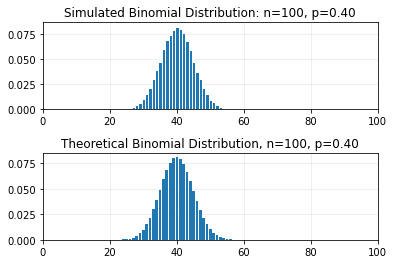

In [41]:
n = 100
p = 0.40

#Simulated Values
sample = np.random.binomial(n=n, p=p, size=100000)
bins = np.arange(-0.5, 100, 1)

#Actual theoretical probabilities
X = np.array(range(n+1))
pmf = binom.pmf(X, n=100, p=0.4)

fig, ax = plt.subplots(nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.5)

# Use histogram because we are binning a list of simulate numbers to calculate the probabilities
ax[0].hist(sample, edgecolor='white', density=True, bins=bins)
ax[0].set_axisbelow(True)
ax[0].grid(alpha=0.25)
ax[0].set_xlim([0, 100]);
ax[0].set_title("Simulated Binomial Distribution: n=100, p=0.40")


# Use bar because we know the probabilities
ax[1].bar(X, pmf)
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25);
ax[1].set_xlim([0, 100]);
ax[1].set_title("Theoretical Binomial Distribution, n=100, p=0.40")

**Special Case** In the case of the binomial distribution, we can actually simulate it using np.random.choice if we think of it as repeated coin tosses:
(P(heads) = 0.40, 0.60).  

In [42]:
#Simulate one experiment (which consists of 100 trials) 
def heads_in_n_tosses(n=100):
    simulate = np.random.choice(["H","T"],size=n,p=[.40, .60])
    return sum(simulate == 'H')

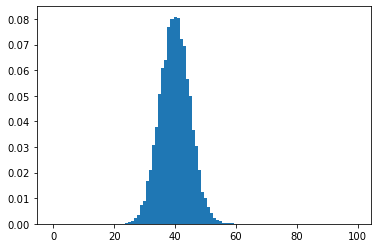

In [44]:
# Repeat the experiment m times:
num_simulations = 10000;

outcomes=[]

for i in np.arange(num_simulations):
    outcomes = np.append(outcomes, heads_in_n_tosses())

plt.hist(outcomes,bins = np.arange(-0.5, 100, 1),   density=True);

**Practice:  Use `scipy.stats.poisson` to plot a histogram of the PMF of a Poisson distribution for lambda = 3**

Text(0.5, 1.0, 'Theoretical Poisson Distribution, lambda=3')

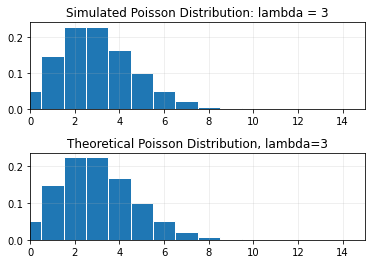

In [48]:
from scipy.stats import poisson

param = 3


#Simulated Values
sample = np.random.poisson(param, size=10000)
bins = np.arange(-0.5, 20, 1)

#Actual theoretical probabilities
X = np.array(range(21))
pmf = poisson.pmf(X, param)

fig, ax = plt.subplots(nrows=2, ncols=1)
plt.subplots_adjust(hspace=0.5)

# Use histogram because we are binning a list of simulate numbers to calculate the probabilities
ax[0].hist(sample, edgecolor='white', density=True, bins=bins)
ax[0].grid(alpha=0.25)
ax[0].set_xlim([0, 15]);
ax[0].set_title("Simulated Poisson Distribution: lambda = 3")


# Use bar because we know the probabilities
ax[1].bar(X, pmf, width=1, ec="white")
ax[1].grid(alpha=0.25);
ax[1].set_xlim([0, 15]);
ax[1].set_title("Theoretical Poisson Distribution, lambda=3")